## gdal/nc4 approach

In [2]:
import gdal
import netCDF4 as nc
from osgeo import osr
import matplotlib.pyplot as plt

In [83]:
tie_geo_nc = r'D:\processing\win\icor_mask\S3B_OL_1_EFR____20190722T133256_20190722T133556_20190723T181207_0179_028_024_3060_LN1_O_NT_002.SEN3\tie_geo_coordinates.nc'
geocoords_nc = r'D:\processing\win\icor_mask\S3B_OL_1_EFR____20190722T133256_20190722T133556_20190723T181207_0179_028_024_3060_LN1_O_NT_002.SEN3\geo_coordinates.nc'
qlflags_nc = r'D:\processing\win\icor_mask\S3B_OL_1_EFR____20190722T133256_20190722T133556_20190723T181207_0179_028_024_3060_LN1_O_NT_002.SEN3\qualityFlags.nc'
wqlflags_nc = r'D:\processing\win\icor_mask\S3B_OL_2_WFR____20190722T133256_20190722T133556_20190723T215914_0179_028_024_3060_MAR_O_NT_002.SEN3\wqsf.nc'

In [52]:
tiecoords_nc_data = nc.Dataset(tie_geo_nc, 'r')

In [4]:
coords_nc_data = nc.Dataset(geocoords_nc, 'r')

In [86]:
qlflags_nc_data = nc.Dataset(qlflags_nc, 'r')

In [88]:
wqf_nc_data = nc.Dataset(wqlflags_nc, 'r')

In [89]:
print(wqf_nc_data.dimensions)

OrderedDict([('columns', <class 'netCDF4._netCDF4.Dimension'>: name = 'columns', size = 4865
), ('rows', <class 'netCDF4._netCDF4.Dimension'>: name = 'rows', size = 4091
)])


In [53]:
print(tiecoords_nc_data)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    absolute_orbit_number: 6456
    ac_subsampling_factor: 64
    al_subsampling_factor: 1
    comment:  
    contact: eosupport@copernicus.esa.int
    creation_time: 2019-07-23T18:12:07Z
    history:   2019-07-23T18:12:07Z: PUGCoreProcessor /data/ipf-s3/workdir42/596609505/JobOrder.596609505.xml
    institution: LN1
    netCDF_version: 4.2 of Mar 13 2018 10:14:33 $
    product_name: S3B_OL_1_EFR____20190722T133256_20190722T133556_20190723T181207_0179_028_024_3060_LN1_O_NT_002.SEN3
    references: S3IPF PDS 004.1 - i2r2 - Product Data Format Specification - OLCI Level 1, S3IPF PDS 002 - i1r7 - Product Data Format Specification - Product Structures, S3IPF DPM 002 - i2r1 - Detailed Processing Model - OLCI Level 1
    resolution: [ 270 294 ]
    source: IPF-OL-1-EO 06.08
    start_time: 2019-07-22T13:32:55.880287Z
    stop_time: 2019-07-22T13:35:55.848029Z
    title: OLCI Level 1b Product, Tie-Point Geo 

In [7]:
print(coords_nc_data)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    absolute_orbit_number: 6456
    ac_subsampling_factor: 64
    al_subsampling_factor: 1
    comment:  
    contact: eosupport@copernicus.esa.int
    creation_time: 2019-07-23T18:12:07Z
    history:   2019-07-23T18:12:07Z: PUGCoreProcessor /data/ipf-s3/workdir42/596609505/JobOrder.596609505.xml
    institution: LN1
    netCDF_version: 4.2 of Mar 13 2018 10:14:33 $
    product_name: S3B_OL_1_EFR____20190722T133256_20190722T133556_20190723T181207_0179_028_024_3060_LN1_O_NT_002.SEN3
    references: S3IPF PDS 004.1 - i2r2 - Product Data Format Specification - OLCI Level 1, S3IPF PDS 002 - i1r7 - Product Data Format Specification - Product Structures, S3IPF DPM 002 - i2r1 - Detailed Processing Model - OLCI Level 1
    resolution: [ 270 294 ]
    source: IPF-OL-1-EO 06.08
    start_time: 2019-07-22T13:32:55.880287Z
    stop_time: 2019-07-22T13:35:55.848029Z
    title: OLCI Level 1b Product, Geo Coordinate

In [8]:
print(qlflags_nc_data)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    absolute_orbit_number: 6456
    ac_subsampling_factor: 64
    al_subsampling_factor: 1
    comment:  
    contact: eosupport@copernicus.esa.int
    creation_time: 2019-07-23T18:12:07Z
    history:   2019-07-23T18:12:07Z: PUGCoreProcessor /data/ipf-s3/workdir42/596609505/JobOrder.596609505.xml
    institution: LN1
    netCDF_version: 4.2 of Mar 13 2018 10:14:33 $
    product_name: S3B_OL_1_EFR____20190722T133256_20190722T133556_20190723T181207_0179_028_024_3060_LN1_O_NT_002.SEN3
    references: S3IPF PDS 004.1 - i2r2 - Product Data Format Specification - OLCI Level 1, S3IPF PDS 002 - i1r7 - Product Data Format Specification - Product Structures, S3IPF DPM 002 - i2r1 - Detailed Processing Model - OLCI Level 1
    resolution: [ 270 294 ]
    source: IPF-OL-1-EO 06.08
    start_time: 2019-07-22T13:32:55.880287Z
    stop_time: 2019-07-22T13:35:55.848029Z
    title: OLCI Level 1b Product, Classification

In [90]:
print(wqf_nc_data)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    absolute_orbit_number: 6456
    ac_subsampling_factor: 64
    al_subsampling_factor: 1
    comment:  
    contact: ops@eumetsat.int
    creation_time: 2019-07-23T21:59:14Z
    history:   2019-07-23T21:59:14Z: PUGCoreProcessor /data/ipf-s3/workdir32/600358894/JobOrder.600358894.xml
    institution: MAR
    netCDF_version: 4.2 of Jul  5 2012 17:07:43 $
    product_name: S3B_OL_2_WFR____20190722T133256_20190722T133556_20190723T215914_0179_028_024_3060_MAR_O_NT_002.SEN3
    references: S3IPF PDS 004.3 - i2r2 - Product Data Format Specification - OLCI Level 2 Marine, S3IPF PDS 002 - i1r7 - Product Data Format Specification - Product Structures, S3IPF DPM 008 - i1r3 - Detailed Processing Model - OLCI Level 2
    resolution: [ 270 294 ]
    source: IPF-OL-2 06.13
    start_time: 2019-07-22T13:32:55.880287Z
    stop_time: 2019-07-22T13:35:55.848029Z
    title: OLCI Level 2 WATER Product, Classification, Q

In [55]:
tie_lon = tiecoords_nc_data.variables['longitude'][:]
tie_lat = tiecoords_nc_data.variables['latitude'][:]

In [9]:
lon = coords_nc_data.variables['longitude'][:]

In [10]:
lat = coords_nc_data.variables['latitude'][:]

In [11]:
flags = qlflags_nc_data.variables['quality_flags'][:,:]

In [91]:
wflags = wqf_nc_data.variables['WQSF'][:,:]

In [99]:
extracted = wflags[wflags == 8]

In [100]:
extracted.shape

(869636,)

In [94]:
flags.shape

(4091, 4865)

In [15]:
flags_nomask = flags.data

In [67]:
type(flags_nomask)

numpy.ndarray

In [62]:
flags_nomask.shape

(4091, 4865)

In [60]:
xmin, ymin, xmax, ymax = [lon.min(), lat.min(), lon.max(), lat.max()]
txmin, tymin, txmax, tymax = [tie_lon.min(), tie_lat.min(), tie_lon.max(), tie_lat.max()]

In [59]:
[lon.min(), lat.min(), lon.max(), lat.max()]

[-64.666183, -13.341156, -50.618148999999995, -0.126354]

In [61]:
[tie_lon.min(), tie_lat.min(), tie_lon.max(), tie_lat.max()]

[-64.666175, -13.341156, -50.618140999999994, -0.126354]

(array([[3957.,    0.,    0., ...,    0.,  134.,    0.],
        [3936.,    0.,    0., ...,    0.,  155.,    0.],
        [3939.,    0.,    0., ...,    0.,  152.,    0.],
        ...,
        [4074.,    0.,    0., ...,    0.,   17.,    0.],
        [4068.,    0.,    0., ...,    0.,   23.,    0.],
        [4056.,    0.,    0., ...,    0.,   35.,    0.]]),
 array([2.14748365e+09, 2.21585080e+09, 2.28421796e+09, 2.35258511e+09,
        2.42095227e+09, 2.48931942e+09, 2.55768658e+09, 2.62605373e+09,
        2.69442089e+09, 2.76278804e+09, 2.83115520e+09]),
 <a list of 4865 Lists of Patches objects>)

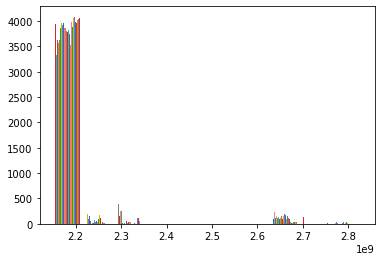

In [68]:
plt.hist(flags)

In [103]:
np.unique(flags)

masked_array(data=[2147483648, 2149580800, 2149580801, 2149580808,
                   2149580864, 2151677952, 2155872256, 2157969408,
                   2157969409, 2157969416, 2160066560, 2164260864,
                   2168455168, 2172649472, 2181038080, 2281701376,
                   2283798528, 2283799040, 2285895680, 2290089984,
                   2292187136, 2294284288, 2298478592, 2684354560,
                   2688548864, 2692743168, 2696937472, 2701131776,
                   2709520384, 2717908992, 2818572288, 2822766592,
                   2826960896, 2831155200],
             mask=False,
       fill_value=999999,
            dtype=uint32)

In [70]:
np.unique(flags_nomask)

array([2147483648, 2149580800, 2149580801, 2149580808, 2149580864,
       2151677952, 2155872256, 2157969408, 2157969409, 2157969416,
       2160066560, 2164260864, 2168455168, 2172649472, 2181038080,
       2281701376, 2283798528, 2283799040, 2285895680, 2290089984,
       2292187136, 2294284288, 2298478592, 2684354560, 2688548864,
       2692743168, 2696937472, 2701131776, 2709520384, 2717908992,
       2818572288, 2822766592, 2826960896, 2831155200], dtype=uint32)

In [124]:
speciflags = wflags == 8
type(speciflags)

numpy.ma.core.MaskedArray

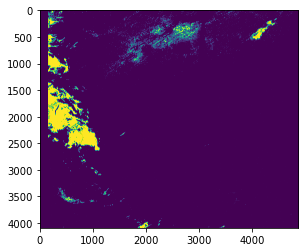

In [122]:
plt.imshow(speciflags)

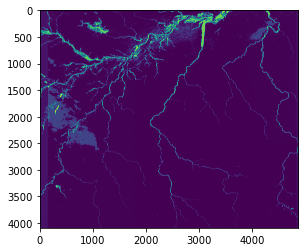

In [72]:
plt.imshow(flags)

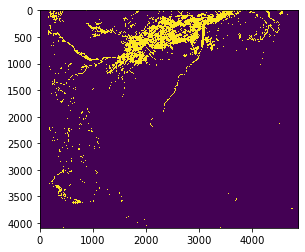

In [120]:
plt.imshow(wflags, vmin=8388607, vmax=8388608)

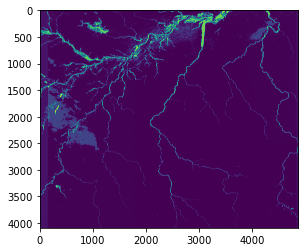

In [65]:
plt.imshow(flags_nomask)

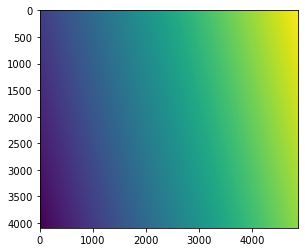

In [23]:
plt.imshow(lon)

In [19]:
# https://gis.stackexchange.com/questions/261677/determine-the-geotransformation-to-convert-a-netcdf-to-geotiff

nx = coords_nc_data.dimensions['columns'].size
ny = coords_nc_data.dimensions['rows'].size

xmin, ymin, xmax, ymax = [lon.min(), lat.min(), lon.max(), lat.max()]
xres = (xmax - xmin) / float(nx)
yres = (ymax - ymin) / float(ny)
geotransform = (xmin, xres, 0, ymax, 0, -yres)
print(geotransform,'\n --- \n',nx, ny)

(-64.666183, 0.0028875712230215845, 0, -0.126354, 0, -0.003230213150818871) 
 --- 
 4865 4091


In [24]:
geotransform2 = (-64.66684894352004, 0.002888197418897582, 0.0, -0.1263540012212161, 0.0, -0.002888197418897582)

In [25]:
dst_ds = gdal.GetDriverByName('GTiff').Create('cloud_test_output_3.tif', nx, ny, 1, gdal.GDT_Float32)
# dst_ds = gdal.GetDriverByName('GTiff').Create('output.tif', ny, nx, 1, gdal.GDT_Float32)

dst_ds.SetGeoTransform(geotransform2)        # specify coords
srs = osr.SpatialReference()                # establish encoding
srs.ImportFromEPSG(4326)                    # WGS84 lat/long
dst_ds.SetProjection(srs.ExportToWkt())     # export coords to file
dst_ds.GetRasterBand(1).WriteArray(flags)   # write r-band to the raster
dst_ds.FlushCache()                         # write to disk
dst_ds = None   

## XARRAY approach

In [27]:
import rioxarray
import xarray

In [28]:
xds = xarray.open_dataset('D:\processing\win\icor_mask\S3B_OL_1_EFR____20190722T133256_20190722T133556_20190723T181207_0179_028_024_3060_LN1_O_NT_002.SEN3\qualityFlags.nc')

In [29]:
xds

<xarray.Dataset>
Dimensions:        (columns: 4865, rows: 4091)
Dimensions without coordinates: columns, rows
Data variables:
    quality_flags  (rows, columns) uint32 ...
Attributes:
    absolute_orbit_number:  6456
    ac_subsampling_factor:  64
    al_subsampling_factor:  1
    comment:                 
    contact:                eosupport@copernicus.esa.int
    creation_time:          2019-07-23T18:12:07Z
    history:                  2019-07-23T18:12:07Z: PUGCoreProcessor /data/ip...
    institution:            LN1
    netCDF_version:         4.2 of Mar 13 2018 10:14:33 $
    product_name:           S3B_OL_1_EFR____20190722T133256_20190722T133556_2...
    references:             S3IPF PDS 004.1 - i2r2 - Product Data Format Spec...
    resolution:             [ 270 294 ]
    source:                 IPF-OL-1-EO 06.08
    start_time:             2019-07-22T13:32:55.880287Z
    stop_time:              2019-07-22T13:35:55.848029Z
    title:                  OLCI Level 1b Product, Classification and Quality...

In [30]:
geoc_xds = xarray.open_dataset('D:\processing\win\icor_mask\S3B_OL_1_EFR____20190722T133256_20190722T133556_20190723T181207_0179_028_024_3060_LN1_O_NT_002.SEN3\geo_coordinates.nc')

In [31]:
geoc_xds

<xarray.Dataset>
Dimensions:    (columns: 4865, rows: 4091)
Dimensions without coordinates: columns, rows
Data variables:
    altitude   (rows, columns) float32 ...
    latitude   (rows, columns) float64 ...
    longitude  (rows, columns) float64 ...
Attributes:
    absolute_orbit_number:  6456
    ac_subsampling_factor:  64
    al_subsampling_factor:  1
    comment:                 
    contact:                eosupport@copernicus.esa.int
    creation_time:          2019-07-23T18:12:07Z
    history:                  2019-07-23T18:12:07Z: PUGCoreProcessor /data/ip...
    institution:            LN1
    netCDF_version:         4.2 of Mar 13 2018 10:14:33 $
    product_name:           S3B_OL_1_EFR____20190722T133256_20190722T133556_2...
    references:             S3IPF PDS 004.1 - i2r2 - Product Data Format Spec...
    resolution:             [ 270 294 ]
    source:                 IPF-OL-1-EO 06.08
    start_time:             2019-07-22T13:32:55.880287Z
    stop_time:              2019-07-22T13:35:55.848029Z
    title:                  OLCI Level 1b Product, Geo Coordinates Data Set

In [33]:
xds.rio.set_crs("epsg:4326")

<xarray.Dataset>
Dimensions:        (columns: 4865, rows: 4091)
Dimensions without coordinates: columns, rows
Data variables:
    quality_flags  (rows, columns) uint32 ...
Attributes:
    absolute_orbit_number:  6456
    ac_subsampling_factor:  64
    al_subsampling_factor:  1
    comment:                 
    contact:                eosupport@copernicus.esa.int
    creation_time:          2019-07-23T18:12:07Z
    history:                  2019-07-23T18:12:07Z: PUGCoreProcessor /data/ip...
    institution:            LN1
    netCDF_version:         4.2 of Mar 13 2018 10:14:33 $
    product_name:           S3B_OL_1_EFR____20190722T133256_20190722T133556_2...
    references:             S3IPF PDS 004.1 - i2r2 - Product Data Format Spec...
    resolution:             [ 270 294 ]
    source:                 IPF-OL-1-EO 06.08
    start_time:             2019-07-22T13:32:55.880287Z
    stop_time:              2019-07-22T13:35:55.848029Z
    title:                  OLCI Level 1b Product, Classification and Quality...

In [34]:
xds["quality_flags"].rio.to_raster('D:\processing\win\icor_mask\test.tif')

DimensionError: x dimension not found. 'set_spatial_dims()' can address this. Data variable: quality_flags

## GDAL band replacing approach

In [41]:
from osgeo import gdal
import osr
import numpy as np
import matplotlib.pyplot as plt

In [27]:
filename = r'D:\processing\win\icor_mask\S3B_OL_1_EFR____20190722T133256_20190722T133556_20190723T181207_0179_028_024_3060_LN1_O_NT_002_processed.tif'

In [29]:
SourceDS = gdal.Open(filename)
projection = SourceDS.GetProjection()
geo_transform = SourceDS.GetGeoTransform()
print(projection,'\n --- \n',geo_transform)

GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]] 
 --- 
 (-64.66684894352004, 0.002888197418897582, 0.0, -0.1263540012212161, 0.0, -0.002888197418897582)


In [36]:
image_mtx = SourceDS.ReadAsArray()
print(type(image_mtx), image_mtx.shape)

<class 'numpy.ndarray'> (16, 4577, 4866)


In [44]:
proj = osr.SpatialReference(wkt=SourceDS.GetProjection())
print(proj.GetAttrValue('AUTHORITY',1))

4326


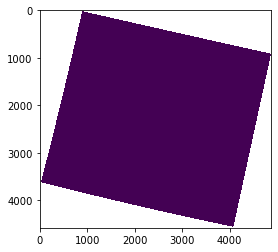

In [39]:
plt.imshow(image_mtx[8])

In [40]:
image_mtx[8,0,0]

nan

In [45]:
info = gdal.Info(SourceDS, deserialize=True)
print(info) 

Driver: GTiff/GeoTIFF
Files: D:\processing\win\icor_mask\S3B_OL_1_EFR____20190722T133256_20190722T133556_20190723T181207_0179_028_024_3060_LN1_O_NT_002_processed.tif
Size is 4866, 4577
Coordinate System is:
GEOGCRS["WGS 84",
    DATUM["World Geodetic System 1984",
        ELLIPSOID["WGS 84",6378137,298.257223563,
            LENGTHUNIT["metre",1]]],
    PRIMEM["Greenwich",0,
        ANGLEUNIT["degree",0.0174532925199433]],
    CS[ellipsoidal,2],
        AXIS["geodetic latitude (Lat)",north,
            ORDER[1],
            ANGLEUNIT["degree",0.0174532925199433]],
        AXIS["geodetic longitude (Lon)",east,
            ORDER[2],
            ANGLEUNIT["degree",0.0174532925199433]],
    USAGE[
        SCOPE["unknown"],
        AREA["World"],
        BBOX[-90,-180,90,180]],
    ID["EPSG",4326]]
Data axis to CRS axis mapping: 2,1
Origin = (-64.666848943520037,-0.126354001221216)
Pixel Size = (0.002888197418898,-0.002888197418898)
Metadata:
  AREA_OR_POINT=Area
Image Structure Metadata:
 

In [47]:
gcps = SourceDS.GetGCPs()


# gcps = ds.GetGCPs()
# gt = gdal.GCPsToGeoTransform(gcps)

In [50]:
print(gcps)

()
